In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# use '%matplotlib widget' for interactive plot

import sys
import matplotlib.pyplot as plt

from zeroheliumkit import GeomCollection, SpiralInductor
from zeroheliumkit.src.settings import *
from zeroheliumkit.src.importing import Reader_DXF, Reader_GDS, Reader_Pickle

<Axes: >

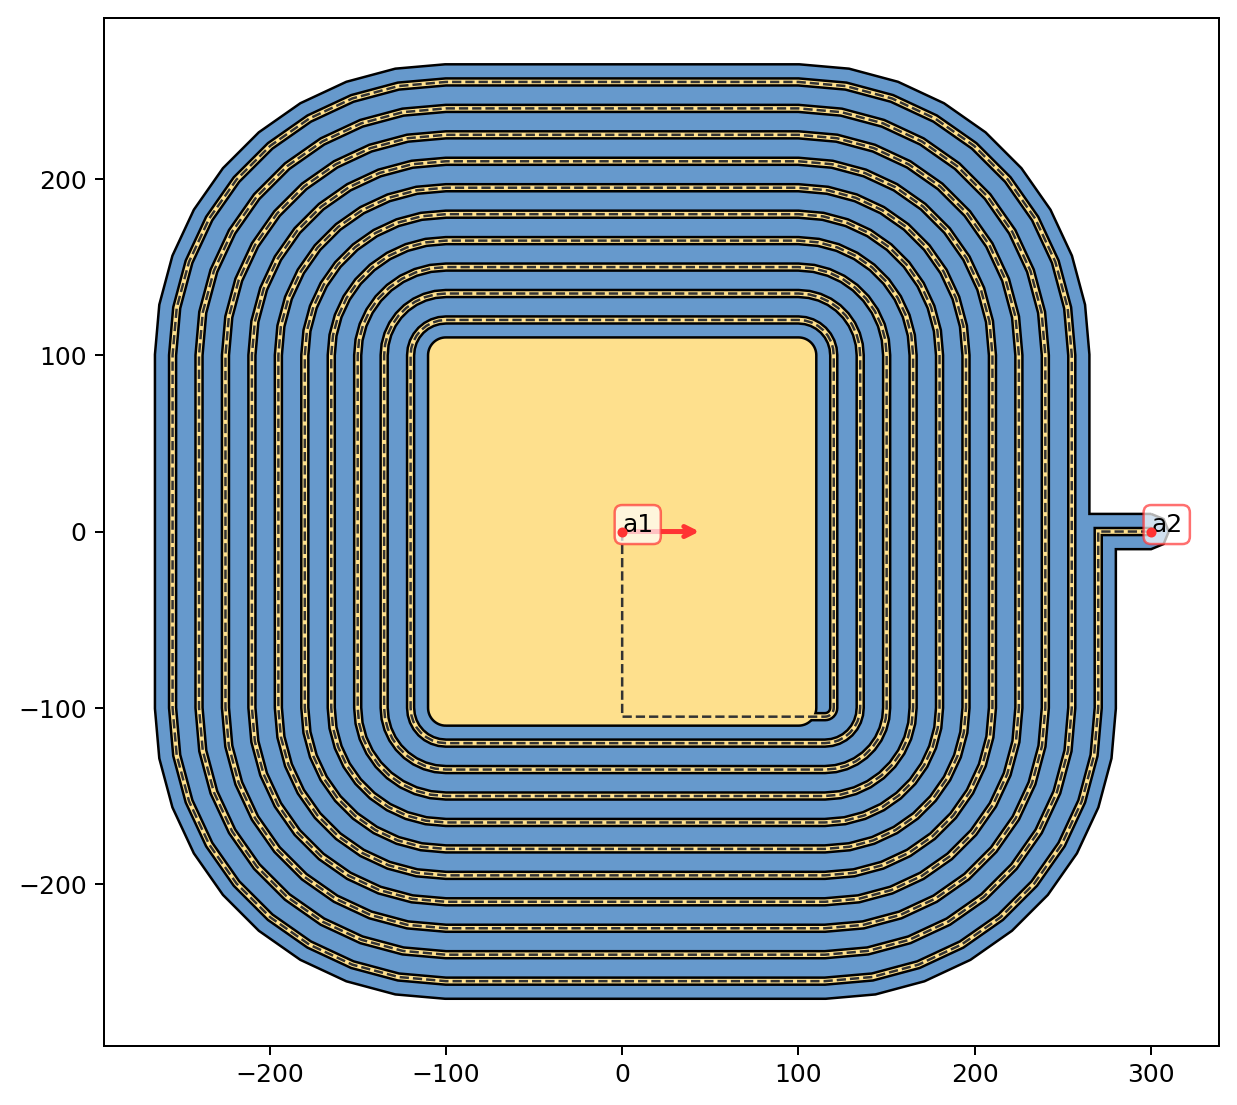

In [2]:
# creating test zhk structure
t = SpiralInductor(size=200,
                   width=10,
                   gap=5,
                   num_turns=10,
                   smallest_section_length=0.1,
                   layers={"metal": 4, "diel": 20},
                   alabel=("a1", "a2"))

plot_cfg = {"diel": BLUE, "metal": YELLOW2, "anchors": RED}
t.quickplot(plot_cfg)

### **testing exporting and importing**

Geometries saved successfully.
test.gds // Layers in cell 'toplevel': {1, 2}


<Axes: >

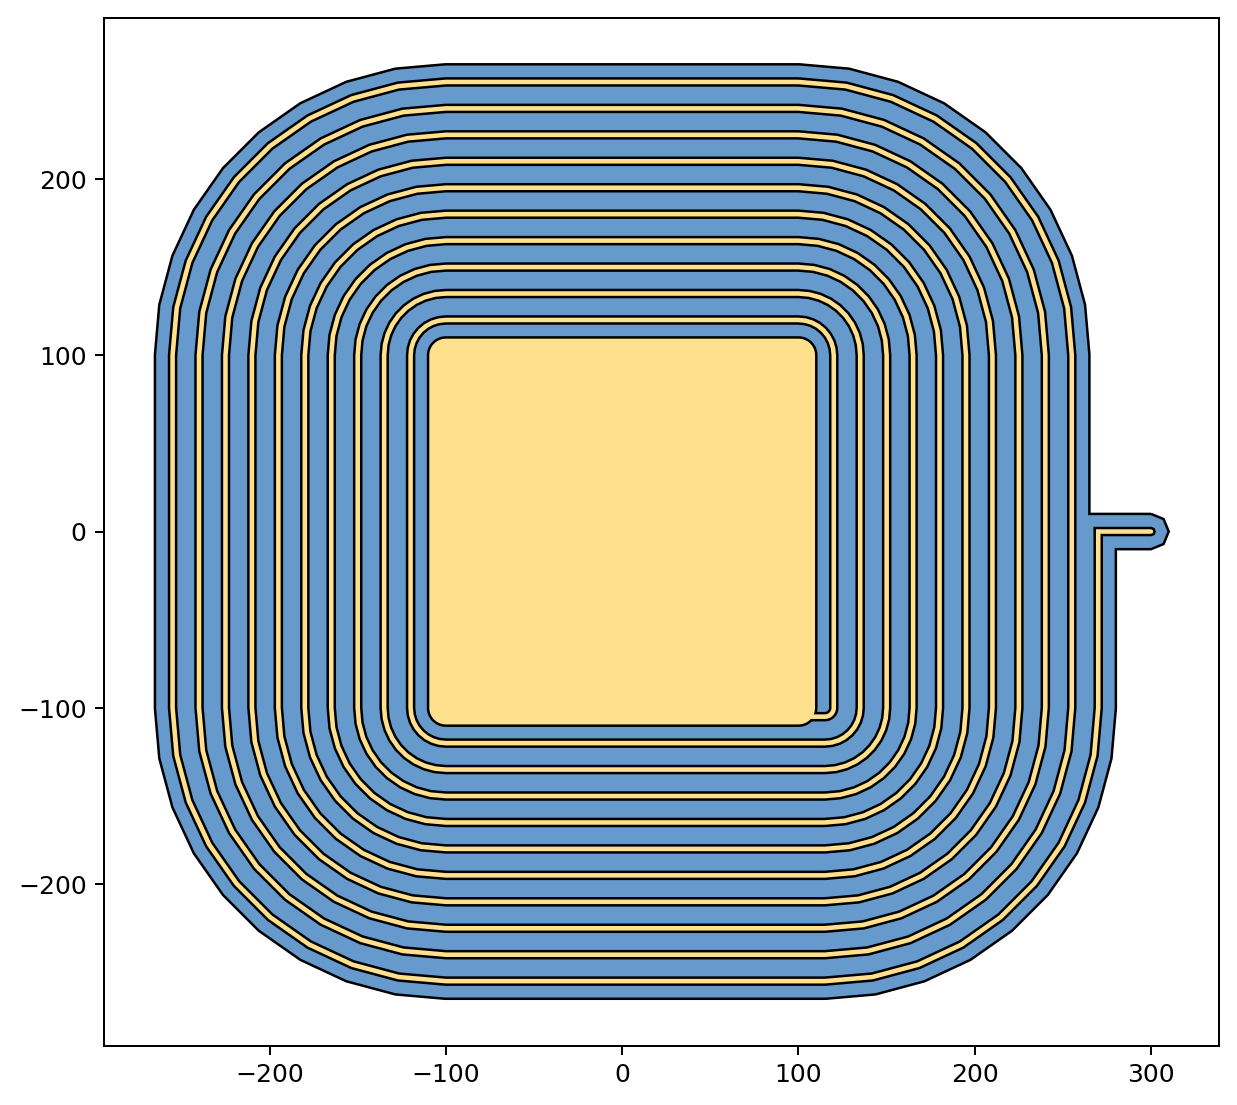

In [3]:
# save to gds
layer_cfg = {"diel": {"layer": 1, "datatype": 0},
             "metal": {"layer": 2, "datatype": 0}}
t.export_gds("test", layer_cfg)

# now we import created file

gds = Reader_GDS("test.gds")
gds.import2zhk()
t1 = GeomCollection(gds.geometries)
plot_cfg = {"L1": BLUE, "L2": YELLOW2, "anchors": RED}
t1.quickplot(plot_cfg)

Geometries saved successfully.
test.dxf // Layers : dict_keys(['diel', 'metal'])


<Axes: >

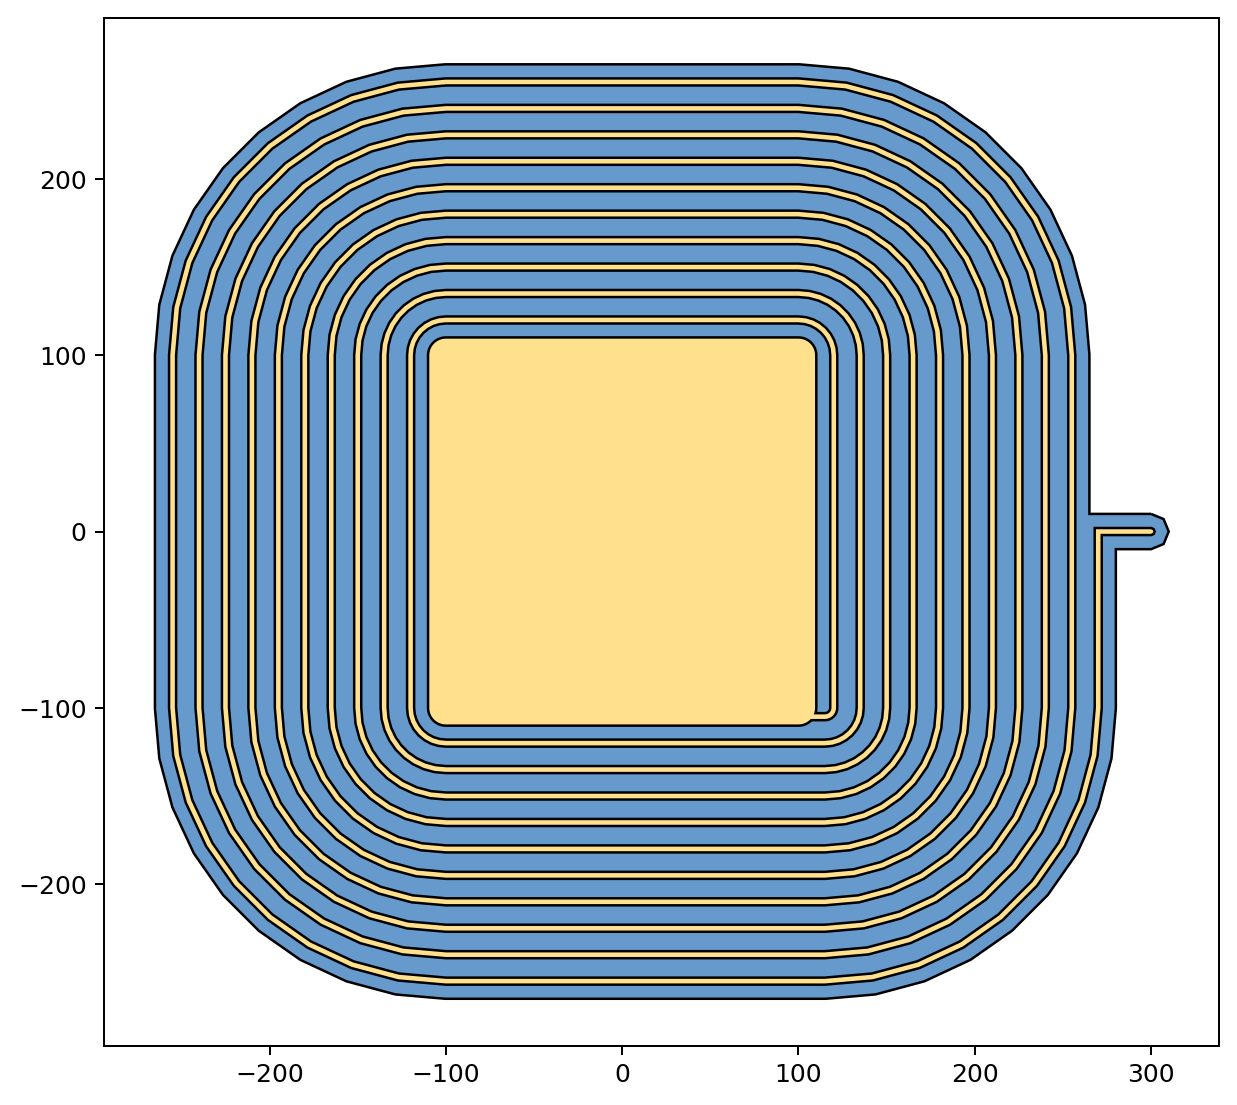

In [4]:
# save to dxf
layer_cfg = {"diel": {"layer": 1, "datatype": 0},
             "metal": {"layer": 2, "datatype": 0}}
t.export_dxf("test", ["diel", "metal"])

# now we import created file

gds = Reader_DXF("test.dxf")
t2 = GeomCollection(gds.geometries)
plot_cfg = {"diel": BLUE, "metal": YELLOW2, "anchors": RED}
t2.quickplot(plot_cfg)

Geometries saved successfully.


<Axes: >

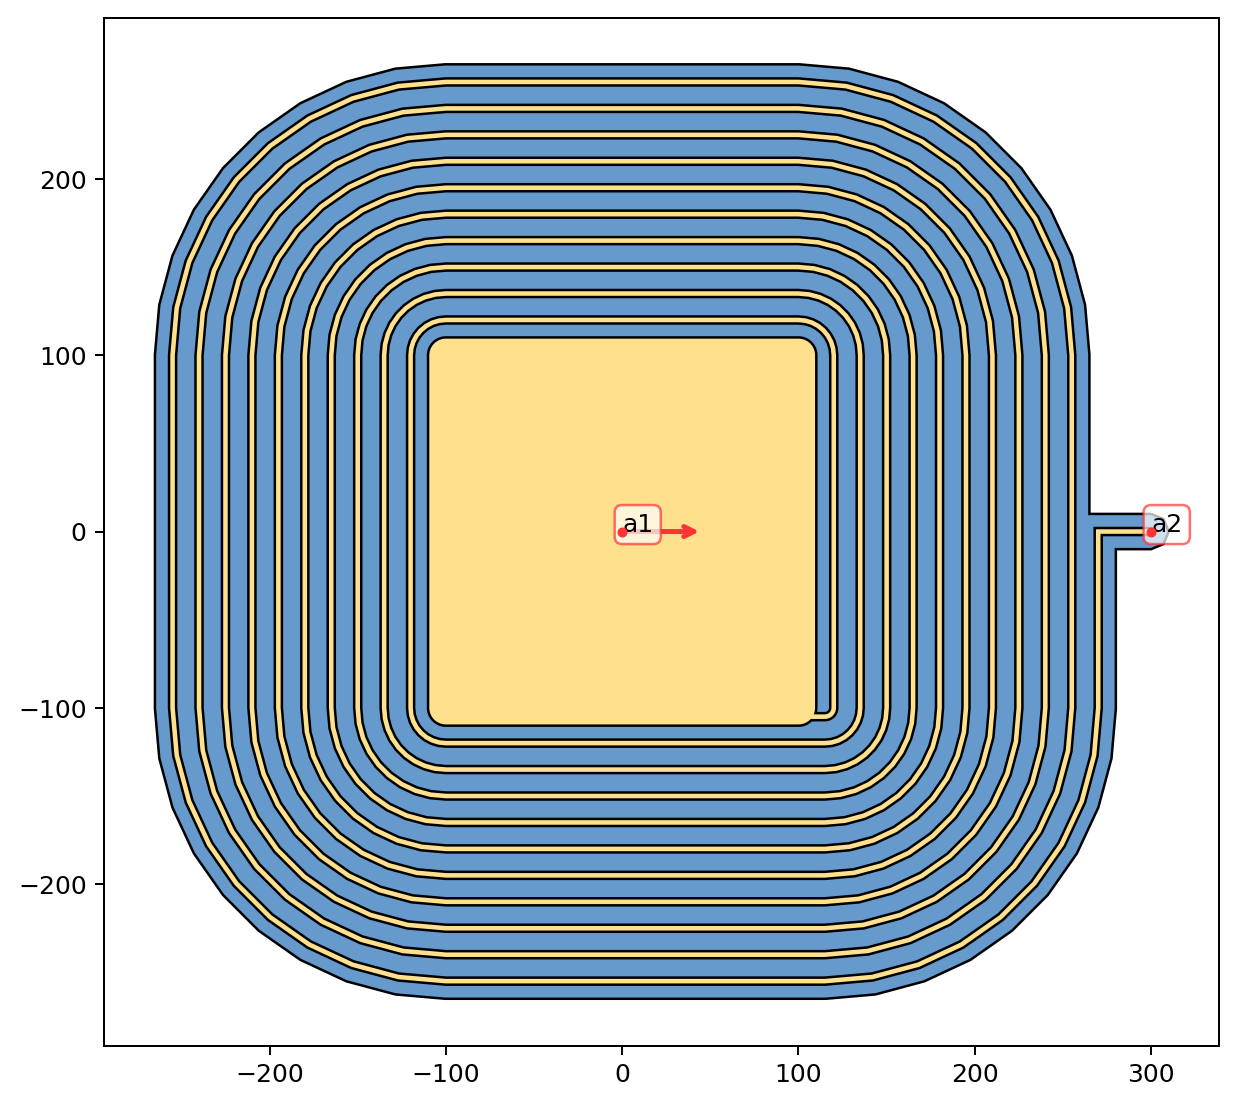

In [5]:
# save to pickle
t.export_pickle("test")

# now we import created file

gds = Reader_Pickle("test.pickle")
t3 = GeomCollection(gds.geometries)
plot_cfg = {"diel": BLUE, "metal": YELLOW2, "anchors": RED}
t3.quickplot(plot_cfg)